![Image](https://drive.google.com/uc?export=view&id=10B8NecPfn9sXRescmijQ8Zc2CO08fQm7)

## **Feature Engineering - Ames Prediction Case**
### ACC Tech Challenge Series, Winter 2020
### Harper Xiang


As the first topic of the ACC tech series, this session shows how we work on feature engineering steps in a machine learning project's process. It is to overview some of the key knots in a ML project by running a simple case.

The data we use, and part of the code we run, are from the Ames Housing case:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "./data/Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Data Dictionary
A description of the variables can be found here:

https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt



## Data Cleaning
From the above, and reading the documentation, here are a few things to note about this data set:
- SalePrice is our target variable
- The authors recommend removing the few houses that are >4000 SQFT (based on the 'Gr Liv Area' variable)
- Many columns have missing data (based on the number of "non-null" entries in each column
- We have many predictor variables

In [4]:
df.shape

(2930, 82)

In [6]:
# Remove all houses that are greater than 4000 sqft ‘Gr Liv Area’, suggested by the authors

df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape

(2925, 82)

- What else cleaning can be done at this moment?

## Explorative Data Analysis

In [7]:
df_m1= df[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 
           'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars','SalePrice']]

In [8]:
## Let's have a look at these variables

df_m1.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.765048,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.759834,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [9]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2924 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [10]:
# There appears to be one NA in Garage Cars - fill with 0
df_m1 = df_m1.fillna(0)

In [11]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


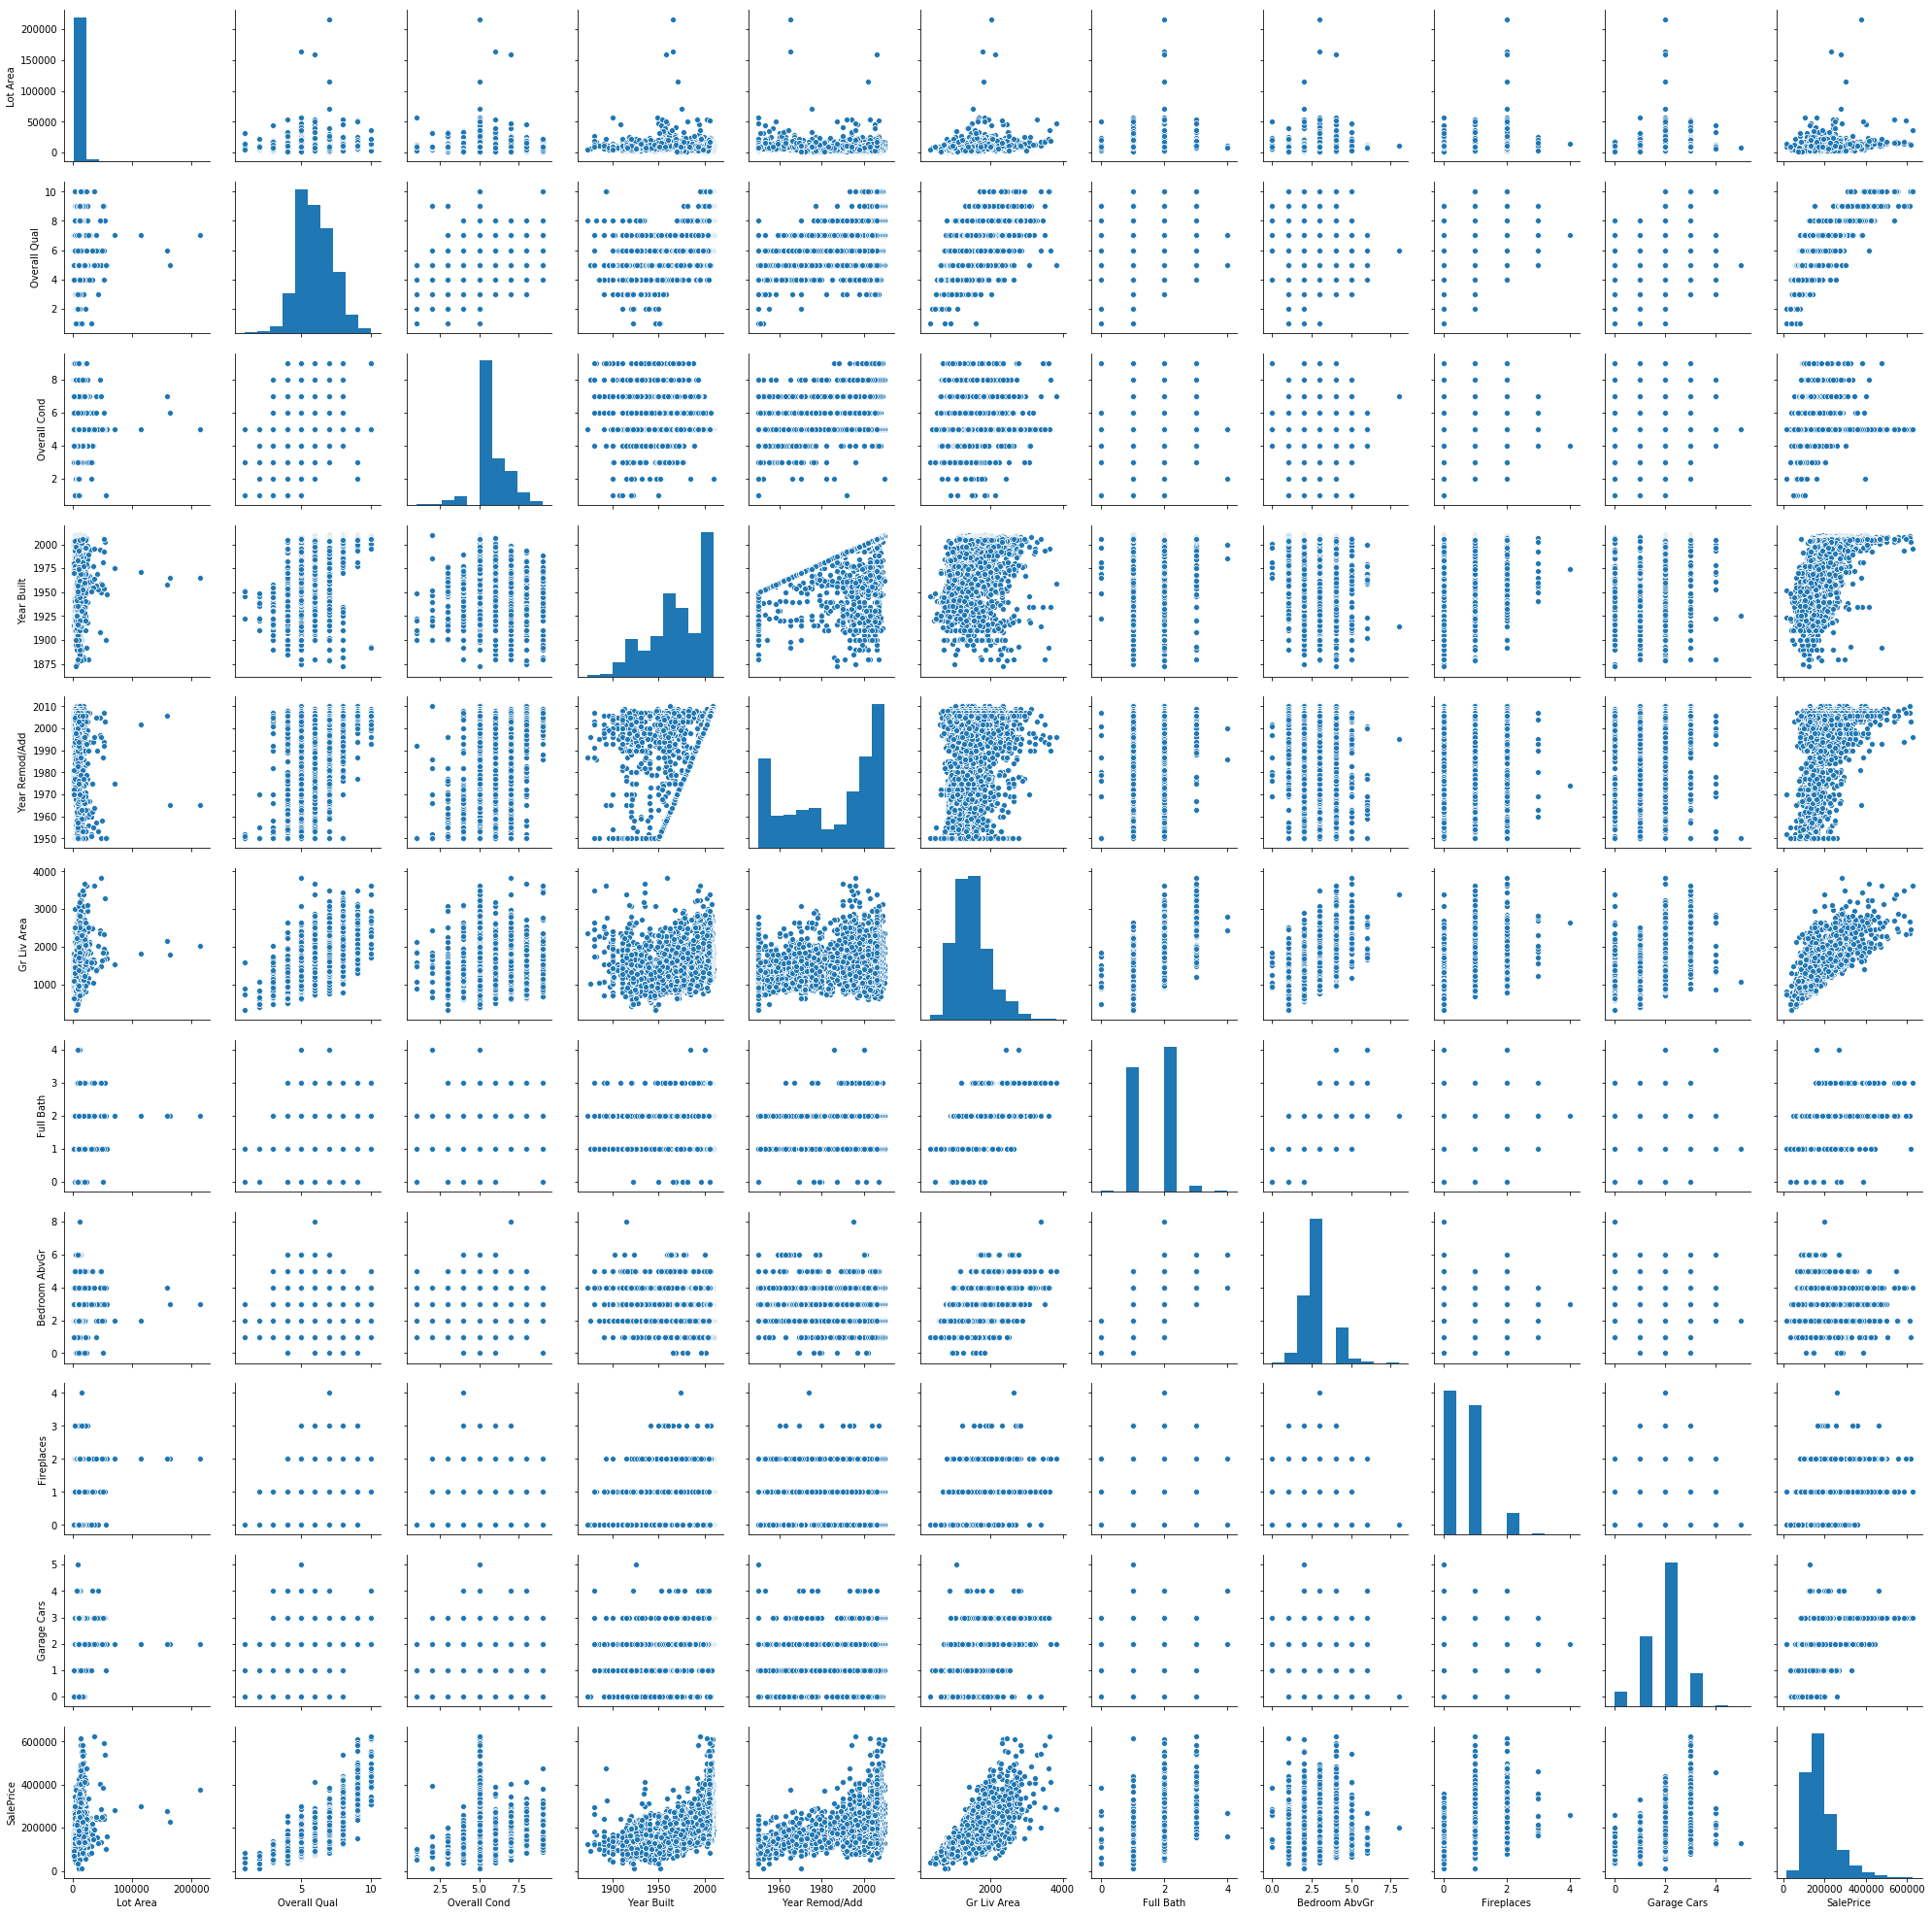

In [12]:
import seaborn as sns
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(df_m1)

### Comprehension question
From the pairplot above:

- Which variables seem to have the strongest correlations with SalePrice?

## Feature Selection by running ANOVA

In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [98]:
sample_anv = df_m1[:]
sample_anv = sample_anv.rename(columns={"Gr Liv Area"  : "GrLivArea",
                                        "Lot Area"     : "LotArea",
                                        "Overall Qual" : "OverallQual"})

In [126]:
mod1 = ols('SalePrice ~ GrLivArea', data=sample_anv).fit()
aov_table = sm.stats.anova_lm(mod1, typ=2)
print(aov_table)

                 sum_sq      df            F  PR(>F)
GrLivArea  9.339851e+12     1.0  3136.619912     0.0
Residual   8.703760e+12  2923.0          NaN     NaN


In [127]:
aov_table = sm.stats.anova_lm(mod1, typ=3)
print(aov_table)

                 sum_sq      df            F    PR(>F)
Intercept  1.285155e+10     1.0     4.315961  0.037844
GrLivArea  9.339851e+12     1.0  3136.619912  0.000000
Residual   8.703760e+12  2923.0          NaN       NaN


In [128]:
mod3 = ols('SalePrice ~ Fireplaces + GrLivArea + OverallQual + LotArea', data=sample_anv).fit()
aov_table = sm.stats.anova_lm(mod3, typ=3)
print(aov_table)

                   sum_sq      df            F         PR(>F)
Intercept    1.698590e+12     1.0  1200.437359  1.197772e-220
Fireplaces   7.237237e+10     1.0    51.147416   1.078416e-12
GrLivArea    1.145105e+12     1.0   809.275361  2.441767e-157
OverallQual  3.982117e+12     1.0  2814.264645   0.000000e+00
LotArea      2.297779e+11     1.0   162.389986   3.081994e-36
Residual     4.131730e+12  2920.0          NaN            NaN


In [129]:
mod2 = ols('SalePrice ~ Fireplaces +  OverallQual + LotArea', data=sample_anv).fit()
aov_table = sm.stats.anova_lm(mod2, typ=3)
print(aov_table)

                   sum_sq      df            F         PR(>F)
Intercept    1.284046e+12     1.0   710.785287  2.377156e-140
Fireplaces   3.184153e+11     1.0   176.259274   4.219211e-39
OverallQual  8.251185e+12     1.0  4567.455752   0.000000e+00
LotArea      5.025005e+11     1.0   278.159870   1.004165e-59
Residual     5.276835e+12  2921.0          NaN            NaN


In [132]:
aov_2v3 = sm.stats.anova_lm(mod2, mod3, typ=1)
print(aov_2v3)

   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0    2921.0  5.276835e+12      0.0           NaN         NaN            NaN
1    2920.0  4.131730e+12      1.0  1.145105e+12  809.275361  2.441767e-157


/Users/Harper/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Harper/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Harper/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Feature Transformation (skipped)

## Standardization (skipped)

## Feature Uncorrelating (PCA) (skipped)

## Train - Test Splits

Train-test splitting is a big part of the data science pipeline. In order to evaluate our model's performance, we need to test it on data that we didn't use when building the model. We have to cut out some section of our data before we do any model-building; to save for use as a "evaluator" of how our model performs on data it's never seen before. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Split the data 70-30 train/test
X = df_m1.drop(['SalePrice'], axis=1)
y = df_m1['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
X_train.shape, X_test.shape

((2047, 10), (878, 10))

In [16]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

## Modeling Approach 1 : Linear Regression
In the first part of this notebook we will use linear regression.  We will start with a simple one-variable linear regression and then proceed to more complicated models.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# First let us fit only on Living Area (sqft)
selected_columns_1 = ['Gr Liv Area']

### Sklearn Modeling
The package scikit-learn has a particular structure to their predictive modeling functionality.  Typically, a model is "defined" then it is "fit" (to a set of examples with their answers).  Then the trained model can be used to predict on a set of (unlabeled) data points.  We will walk through this process in the next few cells.

In [19]:
## First we define a `default` LinearRegression model and fit it to the data (with just `Gr Liv Area' as a predictor
## and SalePrice as the targer.)

lr_model1 = LinearRegression()
lr_model1.fit(X_train[selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.coef_, lr_model1.intercept_

(array([112.05335187]), 12169.835728455451)

### Comprehension Question
- What would this simple model predict as the sales price of a 1000 sq ft home?
- Does that seem reasonable? (Remember, these are house prices in Ames, Iowa between 2006 and 2010)
- Write a function that takes the variables above and predicts the output

In [133]:
lr_model1.predict([[1000]])

array([124223.18760305])

## Plotting the Regression Line
Let's use our knowledge of Matplotlib/Seaborn to make some plots of this data. Let's begin by plotting Price vs Square Footage. Let's also add a line for our model.

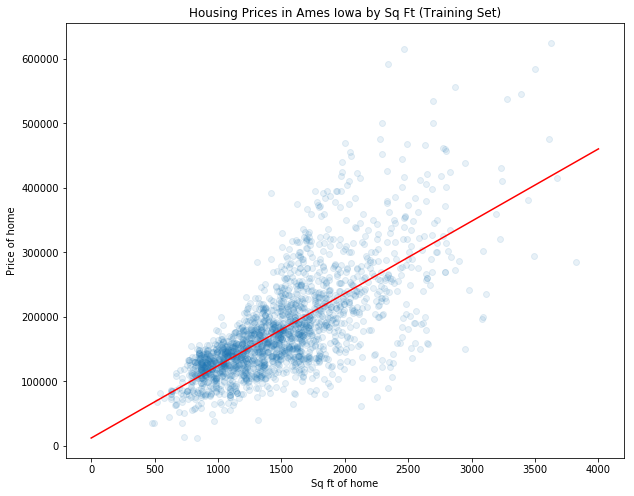

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X_train['Gr Liv Area'], y_train, alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

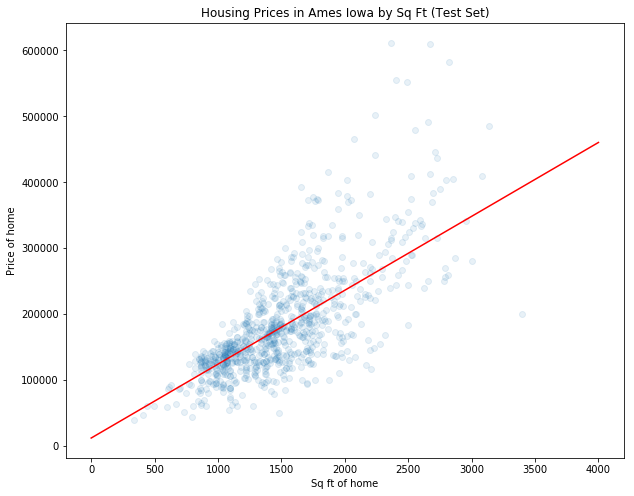

In [26]:
# Let's make a similar plot for the test set

plt.figure(figsize=(10,8))
plt.scatter(X_test['Gr Liv Area'], y_test, alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Test Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

In [27]:
# Let's get predictions of the model on the test set
# Note the use of the `model.predict(feature_matrix)` syntax

test_set_pred1 = lr_model1.predict(X_test[selected_columns_1])

A very useful plot for diagnosing problems is to plot the actual price vs the predicted price. If our model was perfect, every point would be on a perfect 45-degree line starting from (0,0) and extending up with a slope 1. Let's see how we did here.

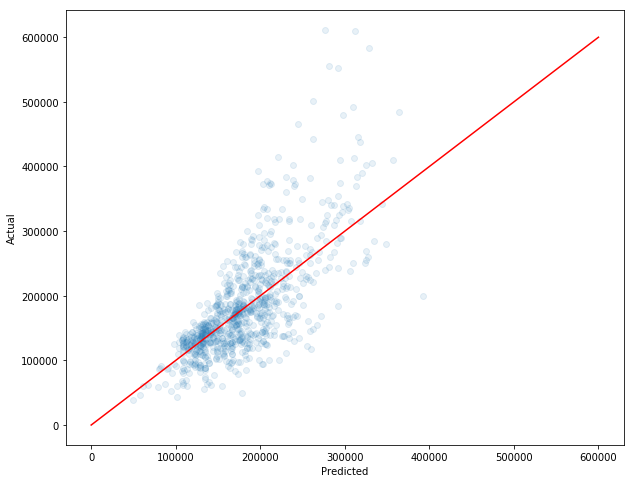

In [28]:
## Let's plot the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000), 'r-')
plt.xlabel("Predicted")
plt.ylabel("Actual");

Let's talk about some metrics and what they're used for.

In [29]:
# How good is our model on the test set?

# Mean Squared Error
def mean_square_error(true, pred):
    return np.mean((pred - true)**2)

mean_square_error(y_test,test_set_pred1)

3068818167.7470694

In [30]:
# Root Mean Square Error
def root_mean_square_error(true,pred):
    return np.sqrt(mean_square_error(true,pred))

root_mean_square_error(y_test,test_set_pred1)

55396.91478545596

In [31]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))

mean_absolute_deviation(y_test, test_set_pred1)

38254.52256793792

In [32]:
# R^2

def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST

R2_score(y_test, test_set_pred1)

0.5262924382126675

Let's put all of those into one nice function that prints out all of our stats:

In [33]:
def model_stats(true, pred):
    print("MSE:", mean_square_error(true, pred))
    print("MAE:", mean_absolute_deviation(true, pred))
    print("RMSE: ", root_mean_square_error(true,pred))
    print("R2: ", R2_score(true,pred))
model_stats(y_test, test_set_pred1)

MSE: 3068818167.7470694
MAE: 38254.52256793792
RMSE:  55396.91478545596
R2:  0.5262924382126675


In [59]:
lr_model1.score(X_test[selected_columns_1], y_test)

0.5262924382126675

That was all well-and-good, but we left a lot of information out when we switched to just the square footage. So let's add some information back in by allowing the "Lot Size" to inform our decisions as well the quality of the home.

In [51]:
selected_columns_2 = ['Lot Area', 'Overall Qual']

In [52]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train[selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lr_model2.coef_

array([2.34673289e+00, 4.36425728e+04])

In [54]:
## This is a hack to show the variables next to their values
list(zip(selected_columns_2, lr_model2.coef_))

[('Lot Area', 2.3467328888649526), ('Overall Qual', 43642.572792710474)]

In [55]:
test_set_pred2 = lr_model2.predict(X_test[selected_columns_2])

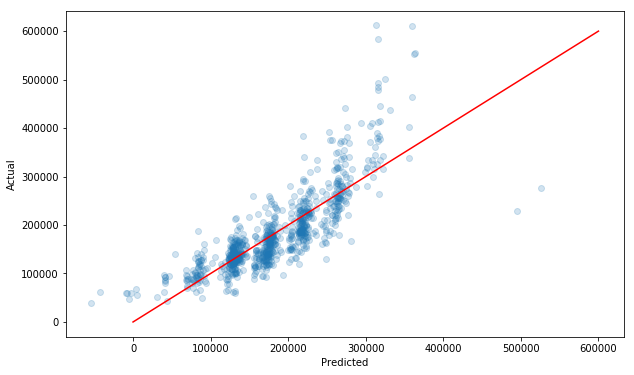

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred2, y_test, alpha=.2)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000),'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [57]:
model_stats(y_test,test_set_pred2)

MSE: 2100705505.1592097
MAE: 31406.10648493379
RMSE:  45833.4539955174
R2:  0.6757318197145743


Excellent! That's an improvement. You can see that our errors went down and our R2 went up. That's lovely. 

## Feature Transformation : Add more features

Since there seems to be some non-linearity, let's make a new variable that is "Greater Living Area"^2. This is called feature engineering since we're "engineering (or making)" a new feature out of our old features.

In [37]:
# NEW feature created

X['GLA2'] = X['Gr Liv Area']**2
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'GLA2'],
      dtype='object')

In [38]:
## We need to recreate the train and test sets -- make sure you use the same random seed!
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [39]:
selected_columns_3 = ['Lot Area', 'Overall Qual', 'GLA2']

In [40]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train[selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
list(zip(X_train[selected_columns_3].columns,lr_model3.coef_))

[('Lot Area', 1.506923214787761),
 ('Overall Qual', 34124.60249032446),
 ('GLA2', 0.015477567877382548)]

In [42]:
test_set_pred3 = lr_model3.predict(X_test[selected_columns_3])

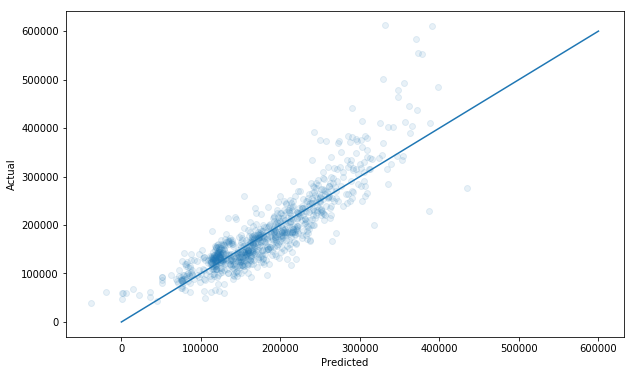

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred3, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [44]:
model_stats(y_test,test_set_pred3)

MSE: 1456872146.1799314
MAE: 26600.794844494518
RMSE:  38168.99456600778
R2:  0.7751149418183274


#### We may keep going on this path to complete our model and feature engineering as well.

#### But in the rest of time, we will talk about other modeling approaches.

## Modeling Approach 2 : Random Forest
Next we explore another approach.  Random Forest are great "off the shelf" since they make few assumptions about the nature of the relationship between the predictors and the target, and can capture higher order interactions without explicity including them.

In [45]:
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'GLA2'],
      dtype='object')

In [47]:
## Remove any variables that were created
## Random Forest gets no extra value from (var^2)
#X.drop('OQ2',axis=1,inplace=True)
X.drop('GLA2',axis=1,inplace=True)

In [48]:
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

In [49]:
## Recreate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
X_train[X_train.isnull().any(axis=1)]

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars


In [51]:
from sklearn.ensemble import RandomForestRegressor

/Users/Harper/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [52]:
rf_model1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [53]:
rf1_test_pred = rf_model1.predict(X_test)

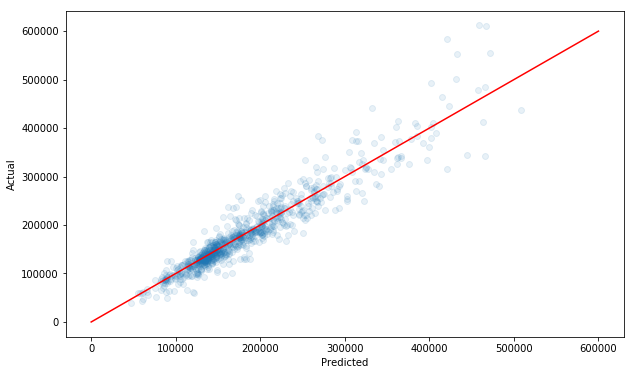

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(rf1_test_pred,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000),'r-');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [55]:
#RMSE
root_mean_square_error(y_test, rf1_test_pred)

25724.857167668517

In [56]:
#MAD
mean_absolute_deviation(y_test, rf1_test_pred)

17025.287453882134

In [57]:
## R-squared
R2_score(y_test,rf1_test_pred)

0.897848416068596

In [59]:
model_stats(y_test, rf1_test_pred)

MSE: 661768276.2969463
MAE: 17025.287453882134
RMSE:  25724.857167668517
R2:  0.897848416068596


#### A big takeaway from Random Forest is, it is a good tool to know features' importance in regression.

#### So it is often used in Feature Selection as well.

In [60]:
list(zip(X.columns,rf_model1.feature_importances_))

[('Lot Area', 0.06508777736359798),
 ('Overall Qual', 0.6281300995263753),
 ('Overall Cond', 0.010464664226394166),
 ('Year Built', 0.04291449164938768),
 ('Year Remod/Add', 0.02652136662619713),
 ('Gr Liv Area', 0.17076867665113774),
 ('Full Bath', 0.012306131486440601),
 ('Bedroom AbvGr', 0.008548578631328642),
 ('Fireplaces', 0.011520843042148341),
 ('Garage Cars', 0.023737370796992036)]

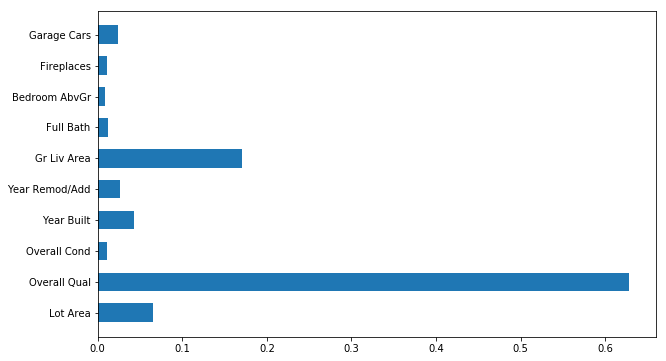

In [63]:
num_categories = len(X.columns)
plt.figure(figsize=(10,6))
plt.barh(range(num_categories),
         rf_model1.feature_importances_,
         edgecolor='none',
         height=0.6,
         align='center')
plt.yticks(range(num_categories),
           X.columns);